In [37]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
from pyuvdata import UVData, UVCal
import hera_cal as hc
from hera_cal.data import DATA_PATH
from collections import OrderedDict as odict
from pyuvdata import utils as uvutils
import copy
import uvtools as uvt
from hera_cal.datacontainer import DataContainer
import aipy
import operator
from astropy import units as u
from astropy import constants as c
import pandas as pd

In [2]:
JD = '2457548'
rawpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/'+JD+'/'
rawpath

'/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/'

In [3]:
#load in all files for that day
filenames = sorted(glob.glob(os.path.join(rawpath, 'zen.' + JD +'*xx.HH.uvcRP')))

In [4]:
len(filenames)

72

In [21]:
%%time
#just make some lists
LST = []
JD = []
FN = []
    
for filename in filenames[0:3]:
    print(filename)
    filename_only = filename.split('/')[-1]
    uvd = UVData()
    uvd.read(filename)
    ntimes = uvd.Ntimes
    LST.append(np.unique(uvd.lst_array))
    JD.append(np.unique(uvd.time_array))
    FN.append([filename_only for i in np.arange(ntimes)])
    
LST = np.array(LST).flatten()
JD = np.array(JD).flatten()
FN = np.array(FN).flatten()

/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.16694.xx.HH.uvcRP
/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.17390.xx.HH.uvcRP
/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.18086.xx.HH.uvcRP
CPU times: user 3.1 s, sys: 219 ms, total: 3.32 s
Wall time: 3.34 s


In [38]:
data = {'Filename': FN, 'Julian Date': JD, 'LST (rad)': LST}

In [39]:
dataframe = pd.DataFrame(data)

In [41]:
dataframe.to_csv('fn_jd_lst.csv')

In [42]:
dataframe_from_file = pd.read_csv('fn_jd_lst.csv')

In [48]:
filename_numpy = np.array(dataframe_from_file['Filename'])

In [12]:
lst_bin_size = 6.*u.min
n_lst_bins = int((24.*u.hr/lst_bin_size).to(u.dimensionless_unscaled).value)

In [13]:
lst_edges = np.linspace(0, 2.*np.pi, n_lst_bins+1, endpoint=True)

In [14]:
lst_start = lst_edges[0:-1]
lst_end = lst_edges[1:]
lst_mid = (lst_start + lst_end)/2.

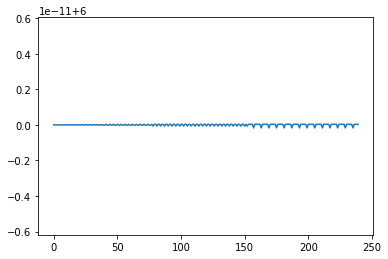

In [15]:
plt.plot((lst_end-lst_start)*24.*60./(2.*np.pi))

In [16]:
(lst_end-lst_start)*24.*60./(2.*np.pi)

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6.

In [11]:
# actually want to loop over i
i = np.argmin(lst_edges - 2.8)
lst_min = lst_start[i]
lst_max = lst_end[i]
lst_range = np.logical_and(LST >= lst_min, LST < lst_max)
jd_to_select = JD[lst_range]

NameError: name 'i' is not defined

In [50]:
files_to_read = np.unique(FN[lst_range])

In [52]:
uvd = UVData()

In [53]:
uvd.read(files_to_read)

In [54]:
lsts_in_file = np.unique(uvd.lst_array)

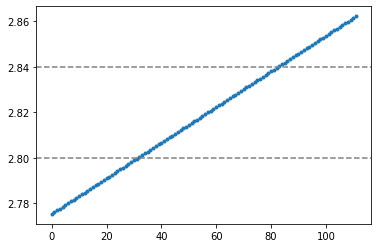

In [58]:
plt.plot(lsts_in_file, '.')
plt.axhline(lst_min, linestyle='--', color='gray')
plt.axhline(lst_max, linestyle='--', color='gray')

In [67]:
one_second = 1/(24.*3600.)

In [68]:
uvd.select(time_range=[jd_to_select.min()-one_second, jd_to_select.max()+one_second])

In [99]:
uvd.phase(lst_mid, lat, allow_rephase = True)

NameError: name 'lat' is not defined

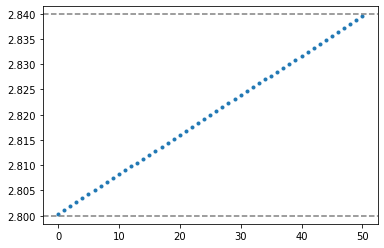

In [69]:
plt.plot(np.unique(uvd.lst_array), '.')
plt.axhline(lst_min, linestyle='--', color='gray')
plt.axhline(lst_max, linestyle='--', color='gray')

In [70]:
jd_to_select.shape

(51,)

In [90]:
lsts_in_file = np.unique(uvd.lst_array)

In [94]:
np.abs(2.8-lsts_in_file.min())*24.*3600./(2.*np.pi)

4.792458259157658

In [95]:
np.abs(2.84-lsts_in_file.max())*24.*3600./(2.*np.pi)

6.906228827659281